## Web scraping data from Amazon website

In [12]:
# Importing the necessary libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Connecting with the web page address

In [13]:
# by passing the bot detection algorithm of amazon by setting User-Agent and Accept-Language as HEADERS
HEADERS = {
    'User-Agent': ('Mozilla/5.0 (X11; Linux x86_64)'
                    'AppleWebKit/537.36 (KHTML, like Gecko)'
                    'Chrome/44.0.2403.157 Safari/537.36'),
    'Accept-Language': 'en-US, en;q=0.5'
}

In [14]:
url ='https://www.amazon.com/s?k=amazon+shopping+online&i=stripbooks&rh=n%3A283155&dc'

In [15]:
# getting the html of the site
html = requests.get(url, headers=HEADERS)
soup = BeautifulSoup(html.text)

#### Getting information from the website

In [16]:
#scrapping the data from the website
data = {"Title":[], "Author":[], "Review":[], "Ratings":[], "Year":[], "Price":[]}
for a in range(1,76):
    
    book_title = soup.find_all('h2',{'class':'a-size-mini a-spacing-none a-color-base s-line-clamp-2'})
    for titles in book_title:
        data['Title'].append(titles.text)
      
    book_author = soup.find_all('div', {'class':"a-row a-size-base a-color-secondary"})
    for a in book_author:
        for b in a.find_all('a', {'class':"a-size-base a-link-normal s-underline-text s-underline-link-text s-link-style"}):
            data['Author'].append(b.text)
            
    book_year = soup.find_all('div', {'class': "a-row" })
    for a in book_year:
        for b in a.find_all('span', {'class': 'a-size-base a-color-secondary a-text-normal'}):
            data['Year'].append(b.text)
            
    book_review = soup.find_all('div', {"class": "a-row a-size-small"})
    for i in book_review:
        for j in i.find_all('span', {"class": "a-size-base"}):
            data['Review'].append(j.text)   
            
    book_rating = soup.find_all('div', {'class':"a-row a-size-small"})
    for a in book_rating:
        for b in a.find_all('span', {'class': 'a-declarative'}):
            data['Ratings'].append(b.text)
            
    book_price = soup.find_all('span',{'class':'a-price'})
    for a in book_price:
        for b in a.find_all('span', {'class': 'a-price-whole'}):
            data['Price'].append(b.text)

In [17]:
data

{'Title': ['The Silent Wife: A gripping, emotional page-turner with a twist that will take your breath away  ',
  'Password Book: Internet Address And Password Organizer, Password Notebook Journal - 5x8 Inch, Password Keeper Logbook With Elegant Cover  ',
  'Lined Notebook: Enchanting Collection Visit Shopping Arrakis Office Vintage Cocktail Distressed Guide Surf Monthly Daily Sci Week Fi Picture 110 Pages The Perfect Book  ',
  'Password Book: Shiti Cant Remember Password Book with Alphabetical Tabs.Password Organizer for Usernames, Logins, Web, And Email Addresses.Password ... Personal Login Information Private And Secure  ',
  'Online Shopping Tracker & Password Book for your Shopping Websites: Keep Track of your Online Purchases or Shopping Orders made Through an Online Website - Password Tracker  ',
  "I'm Dead, Now What?: Important Information About My Belongings, Business Affairs, and Wishes  ",
  'Online Shopping Tracker: Tracking Organizer Notebook For Online, purchase order b

In [20]:
# making the data dictionary a DataFrame called amazon_books
amazon_books= pd.DataFrame.from_dict(data, orient='index') 
amazon_books

,0,1,2,3,4,5,6,7,8,9,...,2390,2391,2392,2393,2394,2395,2396,2397,2398,2399
Title,"The Silent Wife: A gripping, emotional page-tu...",Password Book: Internet Address And Password O...,Lined Notebook: Enchanting Collection Visit Sh...,Password Book: Shiti Cant Remember Password Bo...,Online Shopping Tracker & Password Book for yo...,"I'm Dead, Now What?: Important Information Abo...",Online Shopping Tracker: Tracking Organizer No...,The Amazon: What Everyone Needs to Know®,Online Shopping Tracker: Keep Tracking Organiz...,Online shopping tracker journal: Online shoppi...,...,None,None,None,None,None,None,None,None,None,None
Author,Kerry Fisher,Pexelio Publishing,Peter Pauper Press,Mark J. Plotkin,Anita Lee,Roberta M Shaw,Kerry Fisher,Pexelio Publishing,Peter Pauper Press,Mark J. Plotkin,...,None,None,None,None,None,None,None,None,None,None
Review,"19,817",240,"11,702","16,374","4,378","6,070","3,227",26,"10,452",74,...,None,None,None,None,None,None,None,None,None,None
Ratings,4.3 out of 5 stars,4.5 out of 5 stars,4.4 out of 5 stars,4.2 out of 5 stars,4.3 out of 5 stars,4.3 out of 5 stars,4.3 out of 5 stars,4.6 out of 5 stars,4.6 out of 5 stars,4.7 out of 5 stars,...,None,None,None,None,None,None,None,None,None,None
Year,"Nov 13, 2018","Nov 13, 2018","Sep 12, 2021","Sep 12, 2021","May 2, 2022","May 2, 2022","Dec 22, 2021","Dec 22, 2021","Mar 15, 2022","Mar 15, 2022",...,"Nov 26, 2019","Nov 26, 2019","Nov 23, 2020","Nov 23, 2020","May 1, 2022","May 1, 2022","Jul 7, 2022","Jul 7, 2022","Feb 5, 2022","Feb 5, 2022"
Price,8.,3.,0.,5.,5.,0.,0.,0.,0.,0.,...,None,None,None,None,None,None,None,None,None,None


In [21]:
# Transposing the amazon_books
amazon_books.T

,Title,Author,Review,Ratings,Year,Price
0,"The Silent Wife: A gripping, emotional page-tu...",Kerry Fisher,"19,817",4.3 out of 5 stars,"Nov 13, 2018",8.
1,Password Book: Internet Address And Password O...,Pexelio Publishing,240,4.5 out of 5 stars,"Nov 13, 2018",3.
2,Lined Notebook: Enchanting Collection Visit Sh...,Peter Pauper Press,"11,702",4.4 out of 5 stars,"Sep 12, 2021",0.
3,Password Book: Shiti Cant Remember Password Bo...,Mark J. Plotkin,"16,374",4.2 out of 5 stars,"Sep 12, 2021",5.
4,Online Shopping Tracker & Password Book for yo...,Anita Lee,"4,378",4.3 out of 5 stars,"May 2, 2022",5.
...,...,...,...,...,...,...
2395,None,None,None,None,"May 1, 2022",None
2396,None,None,None,None,"Jul 7, 2022",None
2397,None,None,None,None,"Jul 7, 2022",None
2398,None,None,None,None,"Feb 5, 2022",None


In [22]:
#saving the data book.T in a csv format 
amazon_books.T.to_csv('Amazon-books.csv', index=False)

In [23]:
# loading Amazon books as books
books = pd.read_csv('Amazon-books.csv')
books

,Title,Author,Review,Ratings,Year,Price
0,"The Silent Wife: A gripping, emotional page-tu...",Kerry Fisher,"19,817",4.3 out of 5 stars,"Nov 13, 2018",8.0
1,Password Book: Internet Address And Password O...,Pexelio Publishing,240,4.5 out of 5 stars,"Nov 13, 2018",3.0
2,Lined Notebook: Enchanting Collection Visit Sh...,Peter Pauper Press,"11,702",4.4 out of 5 stars,"Sep 12, 2021",0.0
3,Password Book: Shiti Cant Remember Password Bo...,Mark J. Plotkin,"16,374",4.2 out of 5 stars,"Sep 12, 2021",5.0
4,Online Shopping Tracker & Password Book for yo...,Anita Lee,"4,378",4.3 out of 5 stars,"May 2, 2022",5.0
...,...,...,...,...,...,...
2395,NaN,NaN,NaN,NaN,"May 1, 2022",NaN
2396,NaN,NaN,NaN,NaN,"Jul 7, 2022",NaN
2397,NaN,NaN,NaN,NaN,"Jul 7, 2022",NaN
2398,NaN,NaN,NaN,NaN,"Feb 5, 2022",NaN


### Data Wrangling and visualization

In [24]:
# Checking the info
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Title    1200 non-null   object 
 1   Author   450 non-null    object 
 2   Review   1050 non-null   object 
 3   Ratings  1050 non-null   object 
 4   Year     2400 non-null   object 
 5   Price    1875 non-null   float64
dtypes: float64(1), object(5)
memory usage: 112.6+ KB


#### dataset is a mixture of float and object data types. Null values are also present

In [25]:
# shape of the dataset
books.shape

(2400, 6)

In [26]:
#checking for missing values - Null objects
books.isnull().sum()

Title      1200
Author     1950
Review     1350
Ratings    1350
Year          0
Price       525
dtype: int64

In [27]:
#Dropping the null values
books.dropna(axis=0, inplace= True)

In [28]:
# the new shape
books.shape

(450, 6)

In [29]:
#getting just the year value from the Year column
books['Year'] = books['Year'].str[-4:]
books.head(3)

,Title,Author,Review,Ratings,Year,Price
0,"The Silent Wife: A gripping, emotional page-tu...",Kerry Fisher,"19,817",4.3 out of 5 stars,2018,8.0
1,Password Book: Internet Address And Password O...,Pexelio Publishing,240,4.5 out of 5 stars,2018,3.0
2,Lined Notebook: Enchanting Collection Visit Sh...,Peter Pauper Press,"11,702",4.4 out of 5 stars,2021,0.0


In [30]:
#removing "," from the review column and replacing it with nothing
books['Review'] = books['Review'].str.replace(",","")
books.head(3)

,Title,Author,Review,Ratings,Year,Price
0,"The Silent Wife: A gripping, emotional page-tu...",Kerry Fisher,19817,4.3 out of 5 stars,2018,8.0
1,Password Book: Internet Address And Password O...,Pexelio Publishing,240,4.5 out of 5 stars,2018,3.0
2,Lined Notebook: Enchanting Collection Visit Sh...,Peter Pauper Press,11702,4.4 out of 5 stars,2021,0.0


In [31]:
#converting these object data type columns to integer data type
books['Year'] = books['Year'].astype(int)
books['Review'] = books['Review'].astype(int)
books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 450 entries, 0 to 449
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Title    450 non-null    object 
 1   Author   450 non-null    object 
 2   Review   450 non-null    int32  
 3   Ratings  450 non-null    object 
 4   Year     450 non-null    int32  
 5   Price    450 non-null    float64
dtypes: float64(1), int32(2), object(3)
memory usage: 21.1+ KB


In [32]:
#creating new dataframe, df with books on sale between 2009-2019

df= books[(books['Year'] >= 2009) & (books['Year'] <= 2019)]

In [33]:
df.head()

,Title,Author,Review,Ratings,Year,Price
0,"The Silent Wife: A gripping, emotional page-tu...",Kerry Fisher,19817,4.3 out of 5 stars,2018,8.0
1,Password Book: Internet Address And Password O...,Pexelio Publishing,240,4.5 out of 5 stars,2018,3.0
10,Internet Password Book Organizer And Online Sh...,Anita Lee,11,4.4 out of 5 stars,2015,4.0
11,Online Shopping Tracker: Tracking Organizer No...,Roberta M Shaw,29,4.2 out of 5 stars,2015,5.0
16,"The Silent Wife: A gripping, emotional page-tu...",Anita Lee,11702,4.4 out of 5 stars,2019,8.0


In [35]:
# Prices of books between 2009-2019
books_price = df[['Title', 'Price']]
books_price

,Title,Price
0,"The Silent Wife: A gripping, emotional page-tu...",8.0
1,Password Book: Internet Address And Password O...,3.0
10,Internet Password Book Organizer And Online Sh...,4.0
11,Online Shopping Tracker: Tracking Organizer No...,5.0
16,"The Silent Wife: A gripping, emotional page-tu...",8.0
...,...,...
437,"I'm Dead, Now What?: Important Information Abo...",10.0
438,Online Shopping Tracker: Tracking Organizer No...,5.0
439,The Amazon: What Everyone Needs to Know®,16.0
448,"The Silent Wife: A gripping, emotional page-tu...",6.0


In [34]:
#Sorting the df by price in decending order and calling it df_sorted books according to reviews

df_sorted=  df.sort_values("Price", ascending= False)
df_sorted.head()

,Title,Author,Review,Ratings,Year,Price
289,Password Book: Internet Address And Password O...,Pexelio Publishing,74,4.7 out of 5 stars,2018,16.0
439,The Amazon: What Everyone Needs to Know®,Pexelio Publishing,6070,4.3 out of 5 stars,2019,16.0
139,Online Shopping Tracker: Tracking Organizer No...,Pexelio Publishing,1,5.0 out of 5 stars,2015,16.0
64,"The Silent Wife: A gripping, emotional page-tu...",Anita Lee,10452,4.6 out of 5 stars,2018,16.0
214,Online Shopping Tracker: Tracking Organizer No...,Anita Lee,4378,4.3 out of 5 stars,2019,16.0


In [36]:
# sorting books_price in decending other inorder to determine top priced books

top_priced_books= books_price.sort_values('Price',ascending=False)

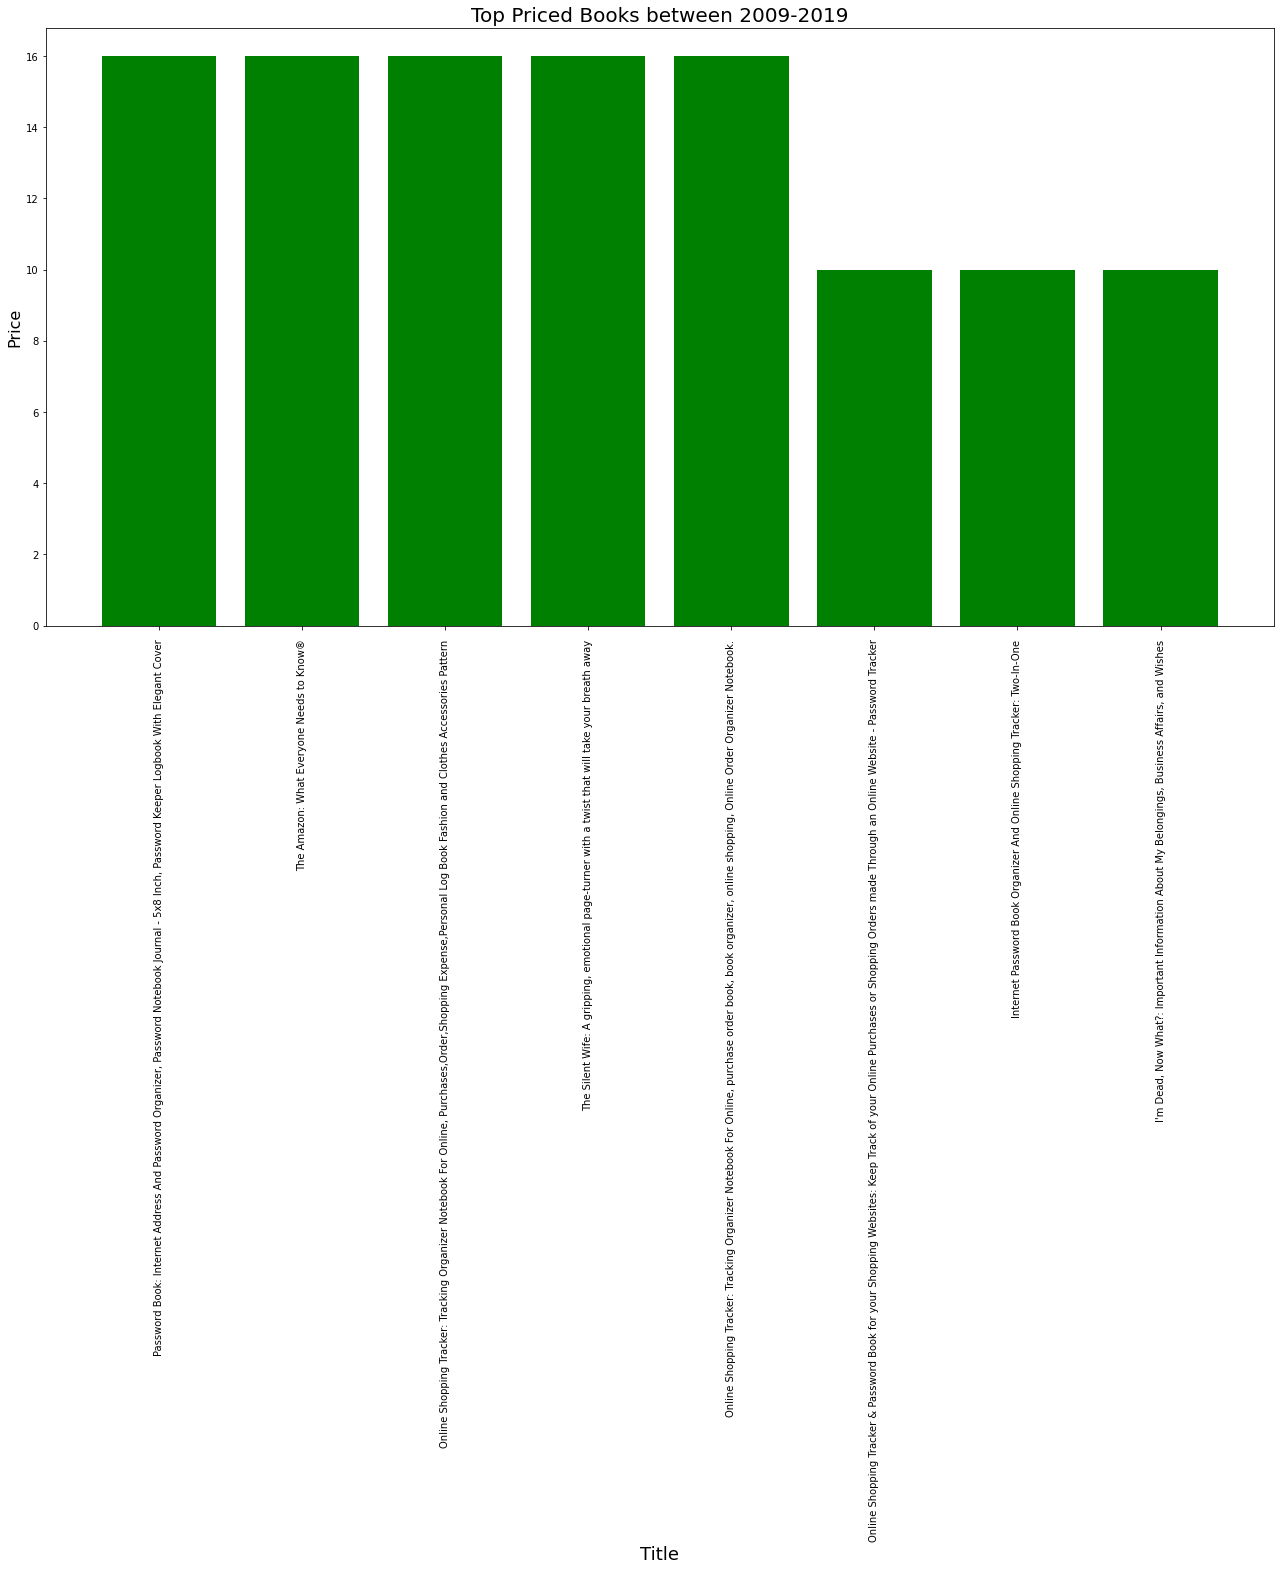

In [37]:
#We will use a bar chart to show the top priced books between 2009-2019
# Set the figsize to (22,11)
fig= plt.figure(figsize=(22, 11))
fig.savefig('Top priced Books.png')
plt.bar(top_priced_books['Title'],top_priced_books['Price'],color='green')
plt.title('Top Priced Books between 2009-2019', fontsize= 20)
plt.xlabel('Title', fontsize= 18)
plt.ylabel('Price', fontsize= 16)
plt.xticks(rotation=90)
plt.show()

#### The top priced books are: Password Book: Internet Address And Password O,	The Amazon: What Everyone Needs to Know, Online Shopping Tracker: Tracking Organizer No, The Silent Wife: A gripping, emotional page-tu, Online Shopping Tracker: Tracking Organizer No.

In [42]:
# frequently reviewed books
reviewed_books = df[['Title', 'Review']]
reviewed_books

,Title,Review
0,"The Silent Wife: A gripping, emotional page-tu...",19817
1,Password Book: Internet Address And Password O...,240
10,Internet Password Book Organizer And Online Sh...,11
11,Online Shopping Tracker: Tracking Organizer No...,29
16,"The Silent Wife: A gripping, emotional page-tu...",11702
...,...,...
437,"I'm Dead, Now What?: Important Information Abo...",16374
438,Online Shopping Tracker: Tracking Organizer No...,4378
439,The Amazon: What Everyone Needs to Know®,6070
448,"The Silent Wife: A gripping, emotional page-tu...",19817


In [43]:
# Sorting in desending order to determine the top viewed books between 2009-2019

top_reviewed_books_sorted_desc= reviewed_books.sort_values('Review',ascending=False)
top_reviewed_books_sorted_desc

,Title,Review
0,"The Silent Wife: A gripping, emotional page-tu...",19817
182,Online Shopping Tracker: Tracking Organizer No...,19817
112,"The Silent Wife: A gripping, emotional page-tu...",19817
406,Online Shopping Tracker: Tracking Organizer No...,19817
336,"The Silent Wife: A gripping, emotional page-tu...",19817
...,...,...
279,The Amazon: What Everyone Needs to Know®,1
96,"The Silent Wife: A gripping, emotional page-tu...",1
363,Online Shopping Tracker: Tracking Organizer No...,1
362,Internet Password Book Organizer And Online Sh...,1


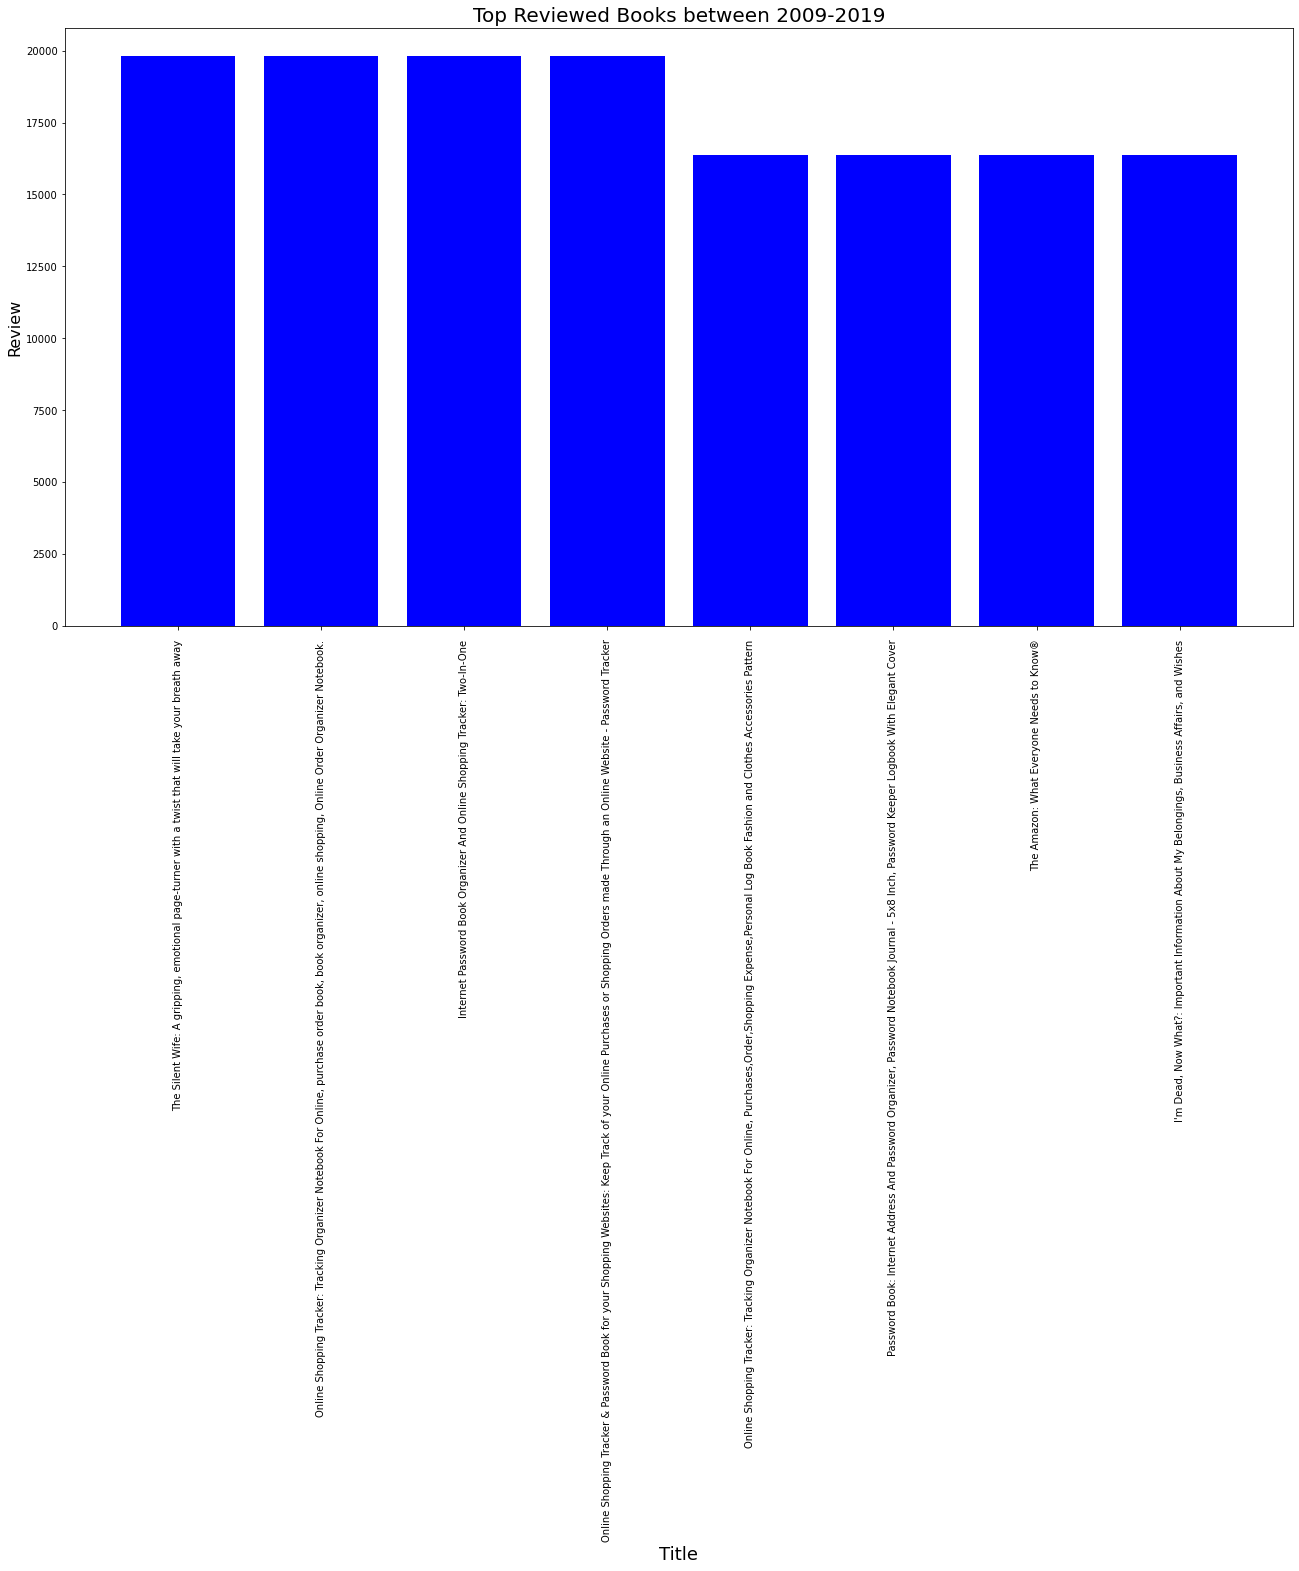

In [53]:
#We will use a bar chart to show the top reviewed books between 2009-2019
# Set the figsize to (22,11)
fig= plt.figure(figsize=(22, 11))
plt.bar(top_reviewed_books_sorted_desc['Title'],top_reviewed_books_sorted_desc['Review'],color='blue')
plt.title('Top Reviewed Books between 2009-2019', fontsize= 20)
plt.xlabel('Title', fontsize= 18)
plt.ylabel('Review', fontsize= 16)
plt.xticks(rotation=90)
plt.show()
fig.savefig('Top Reviewed Books')

In [46]:
#to detemine the number of authors of books using value_counts
authors = df['Author'].value_counts()
authors = authors.to_frame().reset_index()
authors

,index,Author
0,Anita Lee,25
1,Roberta M Shaw,25
2,Kerry Fisher,24
3,Pexelio Publishing,24
4,Peter Pauper Press,22
5,Mark J. Plotkin,22


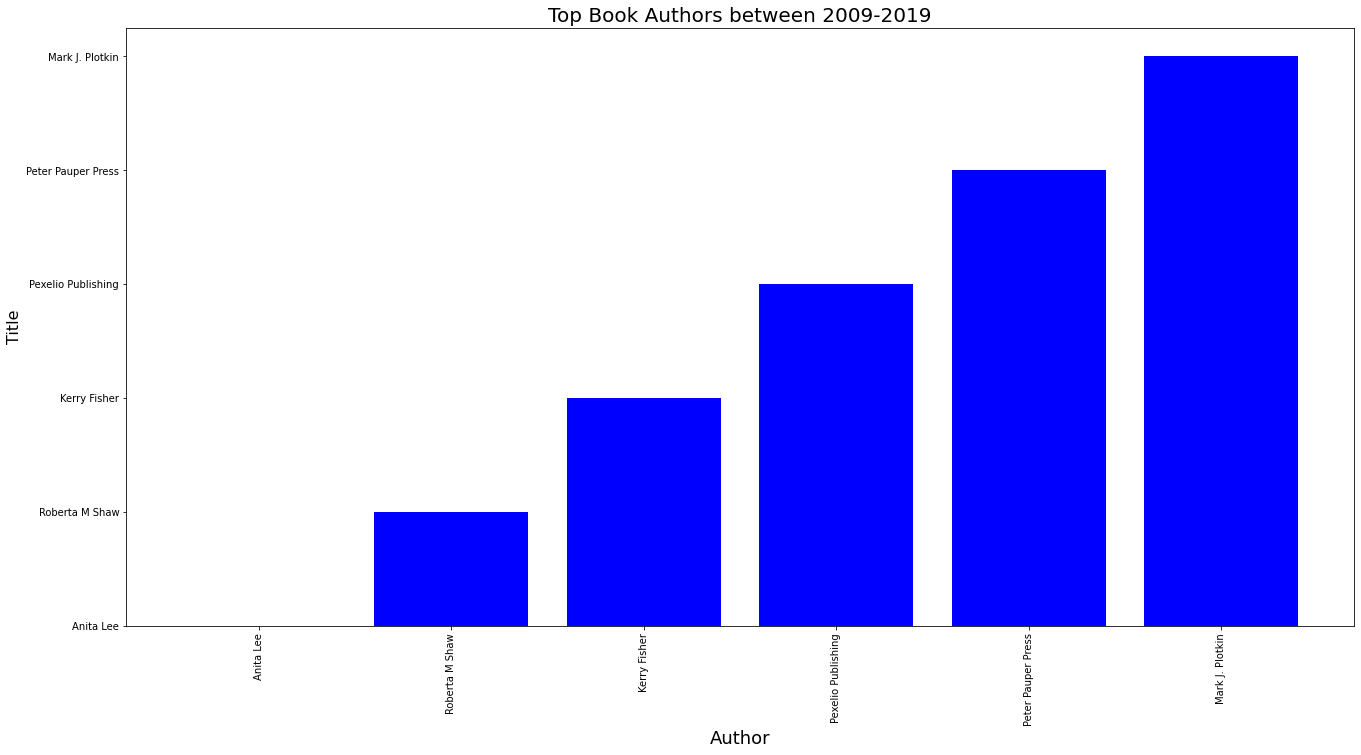

In [49]:
#We will use a bar chart to show the top book authors between 2009-2019
# Set the figsize to (22,11)
fig= plt.figure(figsize=(22, 11))
plt.bar(authors['index'],authors['index'],color='blue')
plt.title('Top Book Authors between 2009-2019', fontsize= 20)
plt.xlabel('Author', fontsize= 18)
plt.ylabel('Title', fontsize= 16)
plt.xticks(rotation=90)
plt.show()
fig.savefig('Top Book Authors')


Mark J. Plotkin, Peter Pauper Press and Pexelio Publishing are the top three authors

In [50]:
# book ratings
book_ratings = df[['Title', 'Ratings']]
book_ratings

,Title,Ratings
0,"The Silent Wife: A gripping, emotional page-tu...",4.3 out of 5 stars
1,Password Book: Internet Address And Password O...,4.5 out of 5 stars
10,Internet Password Book Organizer And Online Sh...,4.4 out of 5 stars
11,Online Shopping Tracker: Tracking Organizer No...,4.2 out of 5 stars
16,"The Silent Wife: A gripping, emotional page-tu...",4.4 out of 5 stars
...,...,...
437,"I'm Dead, Now What?: Important Information Abo...",4.2 out of 5 stars
438,Online Shopping Tracker: Tracking Organizer No...,4.3 out of 5 stars
439,The Amazon: What Everyone Needs to Know®,4.3 out of 5 stars
448,"The Silent Wife: A gripping, emotional page-tu...",4.3 out of 5 stars


In [51]:
# Sorting in desending order to determine the top rated books between 2009-2019

top_rated_books_sorted_desc= book_ratings.sort_values('Ratings',ascending=False)
top_rated_books_sorted_desc

,Title,Ratings
321,Password Book: Internet Address And Password O...,5.0 out of 5 stars
139,Online Shopping Tracker: Tracking Organizer No...,5.0 out of 5 stars
97,Password Book: Internet Address And Password O...,5.0 out of 5 stars
55,The Amazon: What Everyone Needs to Know®,5.0 out of 5 stars
209,Password Book: Internet Address And Password O...,5.0 out of 5 stars
...,...,...
208,"The Silent Wife: A gripping, emotional page-tu...",4.0 out of 5 stars
180,Online Shopping Tracker & Password Book for yo...,4.0 out of 5 stars
54,Online Shopping Tracker: Tracking Organizer No...,4.0 out of 5 stars
404,Online Shopping Tracker & Password Book for yo...,4.0 out of 5 stars


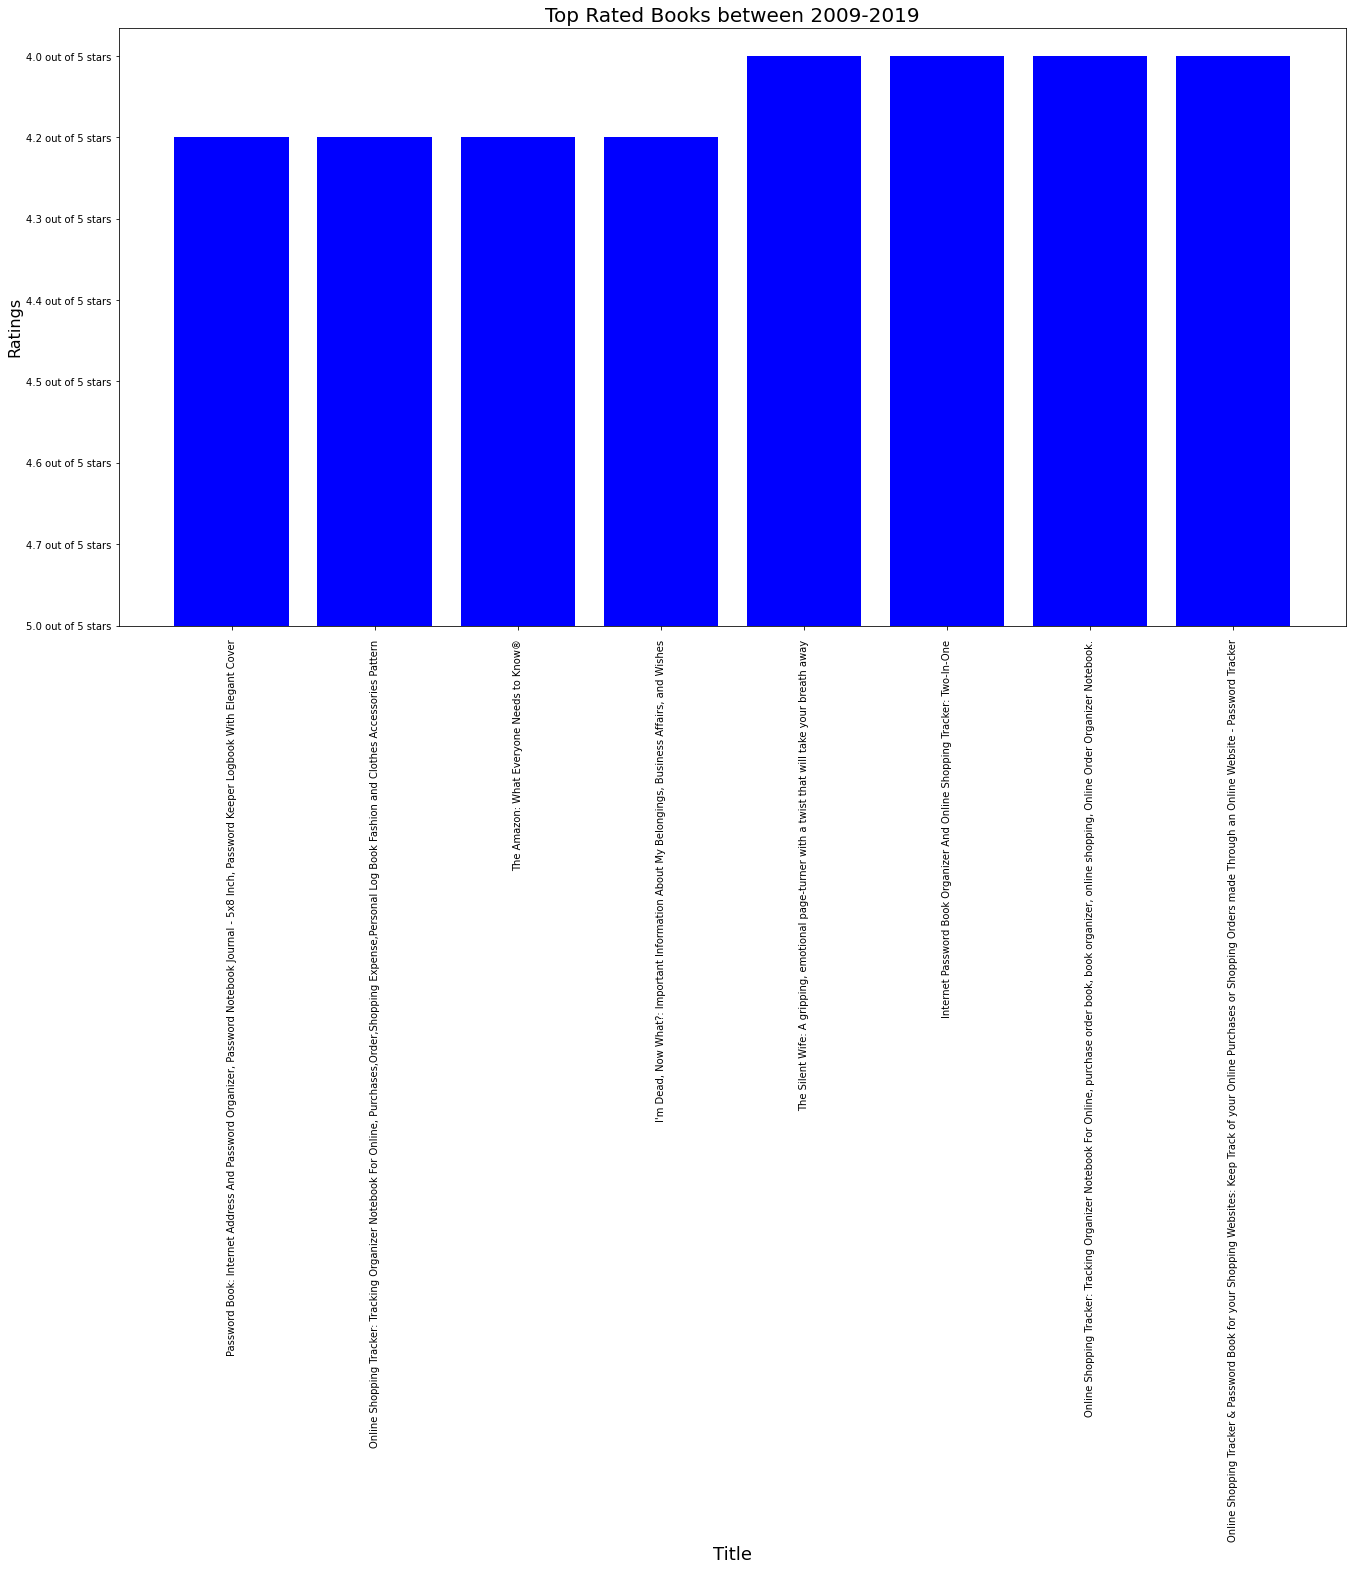

In [52]:
#We will use a bar chart to show the top rated books between 2009-2019
# Set the figsize to (22,11)
fig= plt.figure(figsize=(22, 11))
plt.bar(top_rated_books_sorted_desc['Title'],top_rated_books_sorted_desc['Ratings'],color='blue')
plt.title('Top Rated Books between 2009-2019', fontsize= 20)
plt.xlabel('Title', fontsize= 18)
plt.ylabel('Ratings', fontsize= 16)
plt.xticks(rotation=90)
plt.show()
fig.savefig('Top Rated Books')